## **Problem Statement**
The goal of this project is to build a machine learning model that can identify whether an email is spam or not spam. Spam emails usually contain promotions, scams, or unwanted messages. Detecting these automatically helps users avoid harmful or irrelevant emails.

## **Objective**
- To clean and prepare the email text data.

- To extract useful features from the text.

- To train a model that can classify emails as spam or not spam.

- To evaluate the model’s performance using common metrics.

- To build a reliable spam detection system


## **Data Description**
* The dataset contains two columns:

  * **text** — the email content.
  * **spam** — the target label (1 = spam, 0 = not spam).
* The dataset includes a mix of marketing emails, promotions, and regular emails.


## **Project Workflow**

##### **1. Understanding the Dataset**

* Import and load the dataset .
* Check the shape rows and columns.
* Preview the rows to understand the data.
* Identify missing and  duplicate issues in the dataset.



##### **2. Text Preprocessing**

* Tokenize split text into words.
* Remove stopwords (common words like *the, is, and*).
* Apply  lemmatization to reduce words to their base form.
* Prepare clean text for feature extraction.


##### **3. Exploratory Data Analysis EDA**

* Examine the dataset to understand email types and structure.
* Check the distribution of Spam vs Not Spam emails.
* Look at email lengths (words and characters) in each category.
* Find frequently occurring words in Spam and Not Spam emails


##### **4. Feature Engineering**:

* Generate numeric features like word count and character count.
* Visiualize them and their relationship between spam vs ham emails.


##### **5. Model Building**

Here is a **more concise and clean version**, keeping **only what is necessary** and **fully based on your work**:


##### **6. Model Building**

* Text was vectorized using **BoW**, **TF-IDF**, and **TF-IDF (1–2 grams)**.
* Models trained and compared:

  * **Naive Bayes** (Multinomial, Bernoulli, Gaussian)
  * **Random Forest**
  * **Extra Trees**
  * **Linear SVM**
* Dense feature conversion was applied where required.
* Each model was trained using all vectorization methods.


##### **7. Model Evaluation**


* Use metrics such as Accuracy, Precision, Recall,  F1-score
* Check confusion matrix to see correct and incorrect predictions.
* **Precision** was prioritized to minimize false positives.


##### **8. Prediction on New Emails**

* Test the model on custom email text.
* Convert the new text through the same preprocessing steps.
* Generate the final spam/not-spam prediction.



#### **9 . Result & Conclusion**



#### **Importing Libraries**

In [1]:

import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import warnings
import re


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


#### **Understanding the Dataset**

In [3]:
# load the dataset

df = pd.read_csv('../datasets/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


`text :-` Contains the subject of each email.

`spam :-` The target column indicating whether an email is spam (1) or not (0)

In [10]:

df.sample(5)

,text,spam
686,Subject: does financial freedom interest you ?...,1
4109,Subject: enside draft here is the version wit...,0
1425,"Subject: folks , attached is a conservative (...",0
2201,Subject: hello all just wanted to share the l...,0
4630,Subject: natural gas storage research i am wo...,0


In [11]:
#  shape of the dataset
df.shape

(5728, 2)

In [12]:
# last few rows 
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


##### **Missing Values**

In [13]:
# check for null values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


There are no missing values in the dataset, so no additional handling needed.


##### **Duplicate Records**

In [15]:
print(df.duplicated().sum())

33


`Note:` We have 5728 rows in the dataset and out of which 33 are duplicated.

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


In [17]:
# Updating column names for better readability

df.rename(columns={"spam": "label"}, inplace= True)
df.head()

,text,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


&nbsp;   <!-- non-breaking space -->



#### **Text Preprocessing**

We will first perform text preprocessing to clean the email subjects and make them suitable for analysis. This will include:

- Converting text to lowercase
- Tokenization
- Removing special characters, punctuation, and stop words
- Lemmatization

In [18]:
# converting text to lowercase

df['text'] = df['text'].apply(lambda text: text.lower())
df.head()

,text,label
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [19]:
#  remove special characters  
df['text'] = df['text'].apply(lambda t: re.sub(r'[^a-zA-Z0-9\s]', ' ', t))
df.head()

,text,label
0,subject naturally irresistible your corporate...,1
1,subject the stock trading gunslinger fanny i...,1
2,subject unbelievable new homes made easy im ...,1
3,subject 4 color printing special request add...,1
4,subject do not have money get software cds ...,1


In [20]:
# tokenization

df['text'] = df['text'].apply(lambda text: nltk.word_tokenize(text))
df.head()

,text,label
0,"[subject, naturally, irresistible, your, corpo...",1
1,"[subject, the, stock, trading, gunslinger, fan...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, do, not, have, money, get, software,...",1


In [21]:
#  removing  punctuation, and stop words

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))


In [22]:
# remove stopwords and punctuation
df['text'] = df['text'].apply( lambda tokens:[word for word in tokens if word not in stop_words and word not in string.punctuation])
df.head()

,text,label
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1


In [23]:
# apply lemmatization

lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df.head()

,text,label
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, home, made, easy,...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cd, software, ...",1


In [24]:
# join tokens back into text

df['text'] = df['text'].apply(lambda tokens: " ".join(tokens))

## **EDA**

In [25]:
df['label'].value_counts()

label
0    4327
1    1368
Name: count, dtype: int64

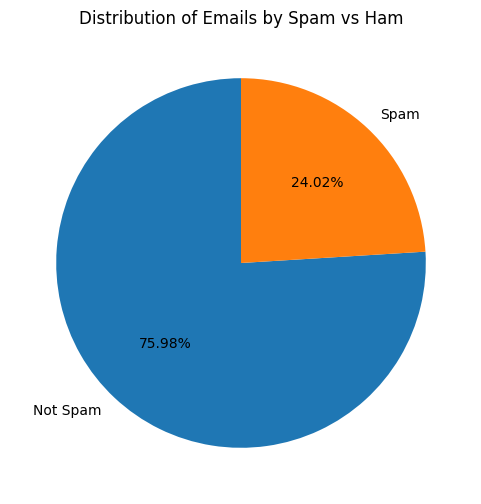

In [26]:

plt.figure(figsize=(6,6))
plt.pie(df['label'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f%%", startangle=90)
plt.title("Distribution of Emails by Spam vs Ham")
plt.show()



`Note:` Class imbalance is present non-spam emails making up a much larger portion of the data.

&nbsp;   <!-- non-breaking space -->


  Let’s take a deeper look into the dataset by creating two new columns to analyze the email subject lines.
- number of characters
-  number of words

In [27]:
# number of characters

df['num_characters'] = df['text'].apply(len)
df.head()

,text,label,num_characters
0,subject naturally irresistible corporate ident...,1,892
1,subject stock trading gunslinger fanny merrill...,1,505
2,subject unbelievable new home made easy im wan...,1,291
3,subject 4 color printing special request addit...,1,372
4,subject money get software cd software compati...,1,128


In [28]:
# number of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,text,label,num_characters,num_words
0,subject naturally irresistible corporate ident...,1,892,114
1,subject stock trading gunslinger fanny merrill...,1,505,64
2,subject unbelievable new home made easy im wan...,1,291,45
3,subject 4 color printing special request addit...,1,372,55
4,subject money get software cd software compati...,1,128,19


In [29]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5695.000000,5695.000000
mean,1013.579104,154.103775
std,1355.574535,199.011145
min,11.000000,2.000000
25%,344.000000,52.500000
50%,636.000000,99.000000
75%,1215.000000,187.000000
max,30156.000000,4330.000000


Checking `describe()` for both spam and not-spam categories across the three columns.

In [30]:
# ham
df[df['label'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4327.000000,4327.000000
mean,1062.487405,162.466143
std,1311.346935,194.159674
min,11.000000,2.000000
25%,374.000000,58.000000
50%,721.000000,113.000000
75%,1314.500000,204.000000
max,30156.000000,4330.000000


In [31]:
# spam
df[df['label'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,1368.000000,1368.000000
mean,858.881579,127.653509
std,1476.710847,211.540204
min,11.000000,2.000000
25%,243.000000,40.000000
50%,441.500000,65.000000
75%,798.250000,121.000000
max,16001.000000,2538.000000


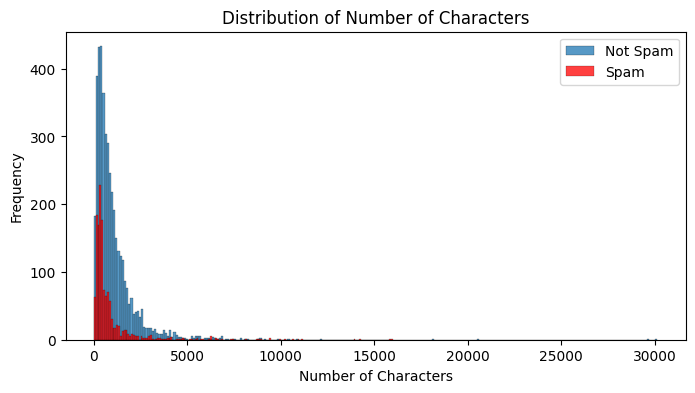

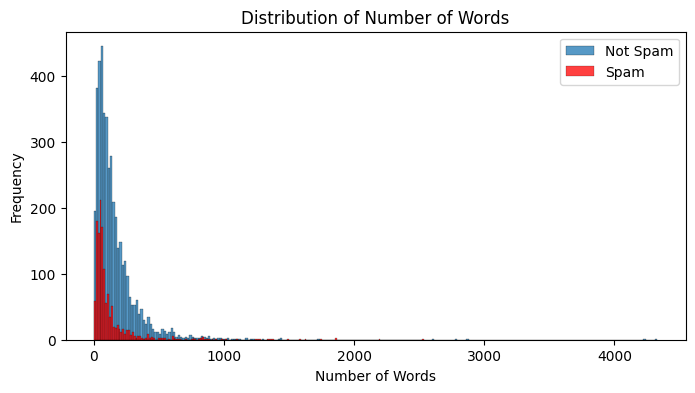

In [32]:
# For num_characters
plt.figure(figsize=(8,4))
sns.histplot(df[df['label'] == 0]['num_characters'], label="Not Spam")
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label="Spam")
plt.title("Distribution of Number of Characters")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# For num_words
plt.figure(figsize=(8,4))
sns.histplot(df[df['label'] == 0]['num_words'], label="Not Spam")
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label="Spam")
plt.title("Distribution of Number of Words")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()



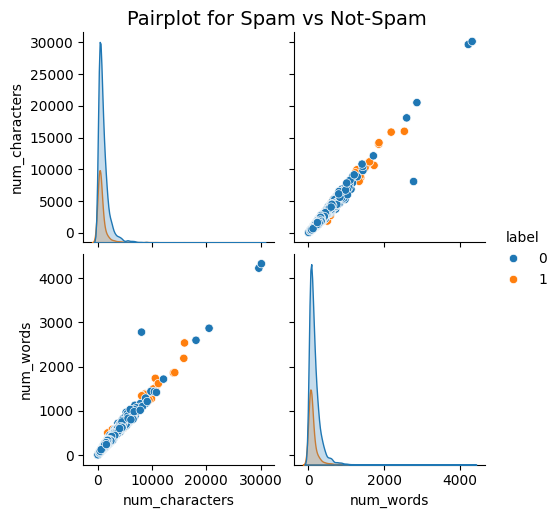

In [33]:
sns.pairplot(df, hue='label')
plt.suptitle("Pairplot for Spam vs Not-Spam", fontsize=14, y=1.02)
plt.show()

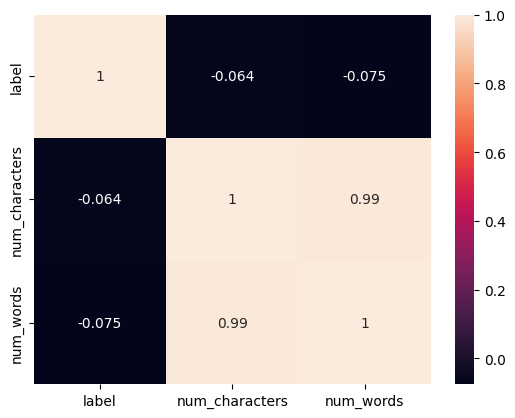

In [34]:
sns.heatmap(df[['label', 'num_characters', 'num_words']].corr(),annot=True)
plt.show()

- Both features have very weak correlation with the label.
  
- But they are highly correlated with each other.
  
- Since muticolinarilty is there so we will be  selecting only one column only for model building.

&nbsp;

Visualizing the most frequent words in spam and non-spam emails using WordClouds


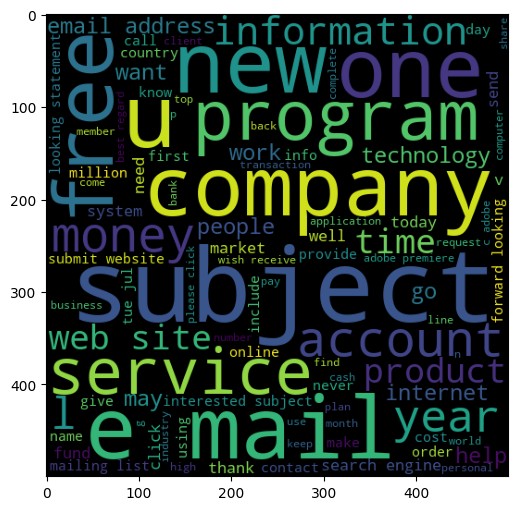

In [35]:
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='black')


# spam word cloud
spam_wc = wc.generate(df[df['label']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

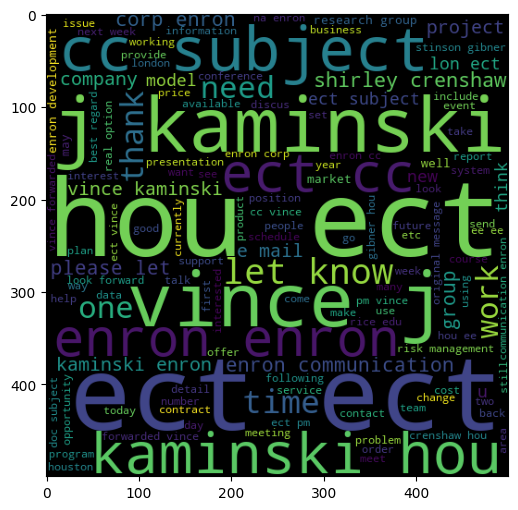

In [36]:

# ham word cloud
ham_wc = wc.generate(df[df['label']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [37]:
spam_corpus = []

for msg in df[df['label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


len(spam_corpus)

174630

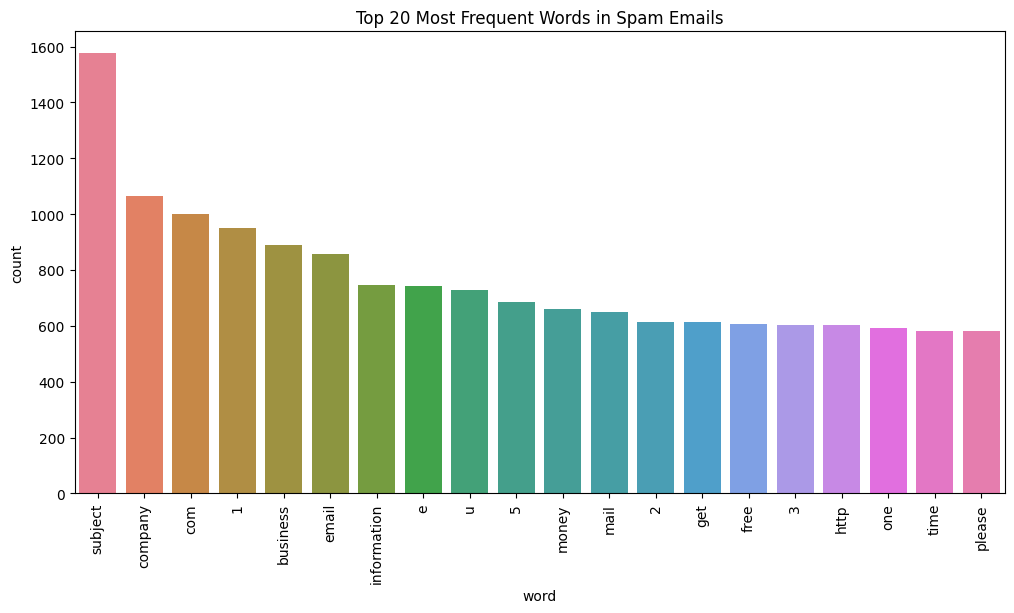

In [38]:

#  get top 20 most common spam words
top20 = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top20, palette=sns.color_palette("husl", 20))
plt.xticks(rotation='vertical')
plt.title("Top 20 Most Frequent Words in Spam Emails")
plt.show()

In [39]:
ham_corpus = []
for msg in df[df['label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

702991

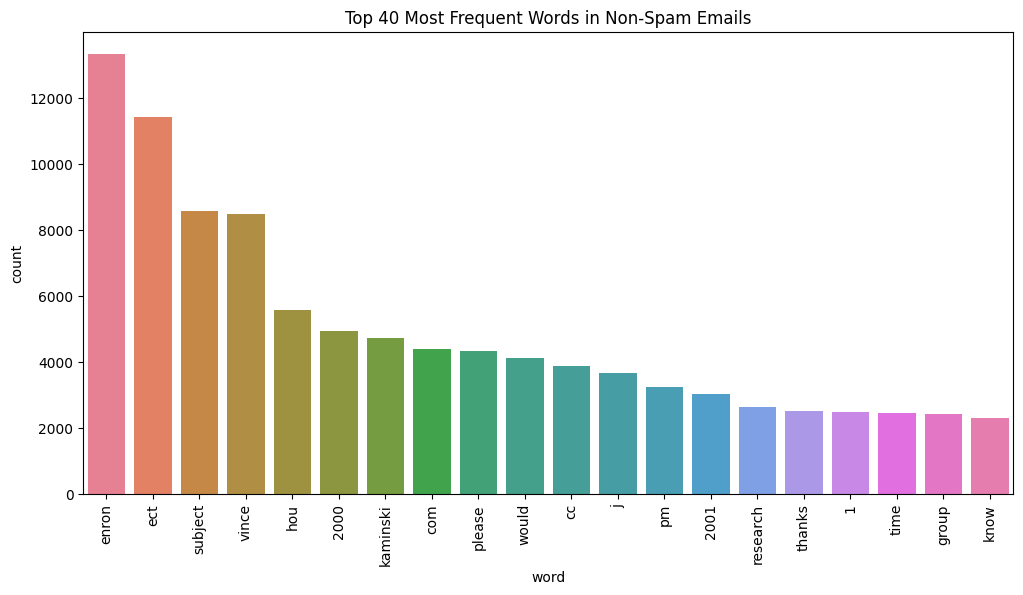

In [40]:

#  get top 20 most common non-spam words
top20 = pd.DataFrame(Counter(ham_corpus).most_common(20), columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=top20, palette=sns.color_palette("husl", 20))
plt.xticks(rotation='vertical')
plt.title("Top 40 Most Frequent Words in Non-Spam Emails")
plt.show()

##  **Model Building**



In [41]:
X = df['text']
y = df['label']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4556,)
y_train shape: (4556,)
X_test shape: (1139,)
y_test shape: (1139,)


In [42]:
# text vectorization
bow = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)
tfidf_bigram = TfidfVectorizer(ngram_range=(1,2), max_features=5000)

In [43]:
# train and transform test for each

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


X_train_tfidf2 = tfidf_bigram.fit_transform(X_train)
X_test_tfidf2  = tfidf_bigram.transform(X_test)



In [44]:
# models 

models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(random_state=42, n_jobs=-1),
    "SVM": SVC(kernel='linear')
}



In [45]:
# evaluate model

results = []

def evaluate_and_store(model_name, vectorizer_name, model, X_tr, y_tr, X_te, y_te, show_confusion=False):

    # Models that require dense input
    needs_dense_models = ["GaussianNB", "RandomForest", "ExtraTrees"]

    if model_name in needs_dense_models:
        X_tr_use = X_tr.toarray()
        X_te_use = X_te.toarray()
    else:
        X_tr_use = X_tr
        X_te_use = X_te

    # train the model
    model.fit(X_tr_use, y_tr)

    # Predict
    y_pred = model.predict(X_te_use)

    # Metrics
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred)
    rec = recall_score(y_te, y_pred)

    # Store results
    results.append({
        "Algorithm": model_name,
        "Vectorizer": vectorizer_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

    # Print summary
    print(f"{model_name} | {vectorizer_name} -> Acc: {acc:.4f}  Prec: {prec:.4f}  Rec: {rec:.4f}")

    # Confusion Matrix (optional)
    if show_confusion:
        cm = confusion_matrix(y_te, y_pred)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {model_name} ({vectorizer_name})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


In [ ]:
# Bag of Word
for name, model in models.items():
    evaluate_and_store(name, "BoW", model, X_train_bow, y_train, X_test_bow, y_test)

# TF-IDF unigrams
for name, model in models.items():
    evaluate_and_store(name, "TF-IDF", model, X_train_tfidf, y_train, X_test_tfidf, y_test)

# TF-IDF with bigrams
for name, model in models.items():
    evaluate_and_store(name, "TF-IDF (1-2)", model, X_train_tfidf2, y_train, X_test_tfidf2, y_test)


MultinomialNB | BoW -> Acc: 0.9921  Prec: 0.9749  Rec: 0.9927
BernoulliNB | BoW -> Acc: 0.9895  Prec: 0.9962  Rec: 0.9599
GaussianNB | BoW -> Acc: 0.9579  Prec: 0.9449  Rec: 0.8759
RandomForest | BoW -> Acc: 0.9868  Prec: 1.0000  Rec: 0.9453


KeyboardInterrupt: 

In [ ]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="Precision", ascending=False).reset_index(drop=True)
results_df_sorted


In [ ]:
import pickle 

# Load the saved TF-IDF vectorizer
with open("saved_models/vectorizer_TF-IDF.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Load the saved SVM model
with open("saved_models/SVM_TF-IDF.pkl", "rb") as f:
    loaded_svm = pickle.load(f)

# Example: 5 random text samples
sample_texts = [
    "Congratulations! You won a free ticket.",
    "Please review the attached report for today.",
    "Urgent! Claim your prize now.",
    "Let's meet tomorrow at 10 AM.",
    "Get cheap meds online without prescription."
]

# Transform the text using the loaded TF-IDF vectorizer
sample_features = loaded_vectorizer.transform(sample_texts)

# Make predictions
predictions = loaded_svm.predict(sample_features)

# Show results
for text, pred in zip(sample_texts, predictions):
    label = "Spam" if pred == 1 else "Not Spam"
    print(f"Text: {text}\nPrediction: {label}\n")

## **Result**
 ##### **1. RandomForest with Bag-of-Words(BoW):**
   - Achieved perfect precision `1.0` meaning no normal emails were misclassified as spam.
  
   - Recall is `0.945`, so it correctly detects most spam emails.
  
   - Accuracy is `0.987`, showing overall strong performance.
  
   - Best Choice if the main goal is avoiding false positives.
   

 ##### **2. SVM with TF-IDF**

   - Precision is very high `0.993`, with recall also strong `0.974`.
  
   - Accuracy is `0.992`, slightly higher than RandomForest.
  
   - Detects more spam emails while still keeping false positives very low.
  
   - Selected as the preferred model for its balanced performance.




## **Conclusion**

- This project demonstrates how machine learning can filter spam emails using text data.
  
- By cleaning the data, extracting features, and training models, we can reliably detect unwanted emails and reduce inbox clutter.
  
- SVM with TF-IDF provides a good balance between precision and recall while maintaining high accuracy and minimizing false positives.
  
- This makes it the most suitable model for practical spam detection.